# Test 27: F-test for multiple comparison of contrasts between K population means (Contrast Analysis)

## Objective

- In `Test 26`, we looked at how we can test 2 hypotheses:
    - For $K$ given samples from $K$ different populations, is $\mu_0 = \mu_1 = ... \mu_K$
    - For $K$ given samples from $K$ different populations, is the overall mean equal to some hypothesised mean $\mu_0$, i.e. $\mu = \mu_0$

- You can see this as an extension:
    - We want to test if two specific means in the set are equal, i.e. $\mu_i = \mu_j$

    OR 

    - We want to test if some specific combination of means differ from some other specific combination, i.e. $\mu_a + \mu_b = \mu_y + \mu_z$

## Assumptions

- Similar to `Test 26`
    - Each of the $K$ samples are independent of each other
    - The subpopulations should all be normally distributed 
    - The subpopulations should all have the same variance

- In addition, the comparisons to be examined should be decided on at or before the start of the analysis.

## Method

- Let each of the $K$ samples be $x_1, x_2 ... x_k$

- Each of these samples will have their own means, which we'll denote as $\mu_1, \mu_2, ... \mu_k$

- We'll first define a new concept, called a contrast $\gamma$, which measures the degree of difference between all the sample means. This is written as:
$$\begin{aligned}
    \gamma &= \alpha_1 \bar{x_1} + \alpha_2 \bar{x_2} + ... \alpha_k \bar{x_k} \quad \text{s.t} \sum_{i=1}^{k} \alpha_i = 0
\end{aligned}$$

- Intuitively, if the means are all equal, then contrast $\gamma = 0$

- How does this help us test the hypothesis that the difference between 2 means, or 2 linear combinations of means, are 0?
    - If we want to test $H_0: \mu_1 = \mu_2$
    $$\begin{aligned}
        \gamma &= 1 \cdot \bar{x_1} + (-1) \cdot \bar{x_2} + ... (0) \bar{x_k} 
    \end{aligned}$$

    - If we want to test $H_0: 0.5 \mu_1 + 0.5 \mu_2 = 0.333 \mu_3 + 0.333 \mu_4 + 0.333 \mu_5 $
    $$\begin{aligned}
        \gamma &= 0.5 \bar{x_1} + 0.5 \bar{x_2} + (-0.333) \bar{x_3} + (-0.333) \bar{x_4} + (-0.333) \bar{x_5} + ... (0) \bar{x_k} 
    \end{aligned}$$

- Once we have defined this, the test statistic is:
$$\begin{aligned}
    F &= \frac{1}{s^2} \cdot \frac{(\sum_{j=1}^{K} \alpha_j \bar{x_j})^2}{\sum_{j=1}^K \frac{\alpha_j^2}{n_j}} \\ \\

    s^2 &= \frac{\sum_{j=1}^{K} \sum_{i=1}^{n_j} (x_{ij}^2 - \sum_{j=1}^{K} n_j \bar{x_j}^2)}{N - K}
\end{aligned}$$

- What happens in the special case where we only want to test $H_0: \mu_1 = \mu_2$? Recall that $\alpha_1 = 1$ and $\alpha_2 = -1$
$$\begin{aligned}
    F &= \frac{1}{s^2} \cdot \frac{(\sum_{j=1}^{K} \alpha_j \bar{x_j})^2}{\sum_{j=1}^K \frac{\alpha_j^2}{n_j}} \\
    &= \frac{1}{s^2} \cdot \frac{(\bar{x_1} - \bar{x_2})^2}{\frac{1}{n_1} + \frac{1}{n_2}} \\
\end{aligned}$$

- The test statistic follows an $F$ distribution with $(1, N-K)$ degrees of freedom

## Proof that test statistic follows an F distribution

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
K = 4
MEAN = [5] * K
SIGMA = [2] * K
SAMPLE_SIZE = np.random.randint(500,600,K)
TOTAL_SAMPLE_SIZE = np.sum(SAMPLE_SIZE)

def make_constrast_weights(set1, set2):
    alpha = np.zeros(K)
    set1_coef = 1/len(set1)
    set2_coef = -1/len(set2)
    alpha[set1] = set1_coef
    alpha[set2] = set2_coef

    assert np.sum(alpha) == 0

    return alpha

def get_test_statistic_contrast(lhs_sample_index, rhs_sample_index):
    samples = [np.random.normal(x,y,z) for x,y,z in zip(MEAN, SIGMA, SAMPLE_SIZE)]
    sample_means = [np.mean(x) for x in samples]
    
    alpha = make_constrast_weights(lhs_sample_index, rhs_sample_index)
    
    s_sq = (
        (
            np.sum([np.sum(x**2) for x in samples]) - 
            np.sum([n * xbar**2 for n, xbar in zip(SAMPLE_SIZE, sample_means)])
        ) /
        (TOTAL_SAMPLE_SIZE - K)
    )

    test_statistic = (
        (1/s_sq) *
        np.sum([a*xbar for a, xbar in zip(alpha, sample_means)])**2 *
        (1 / np.sum([a**2/n for a,n in zip(alpha, SAMPLE_SIZE)]))
    )
    
    return test_statistic

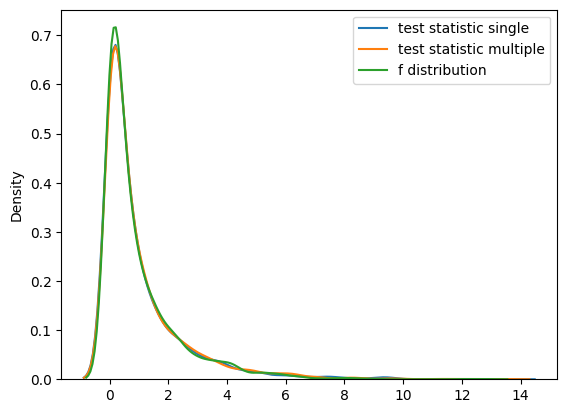

In [66]:
test_statistic_distribution_single = [get_test_statistic_contrast([0],[1]) for _ in range(3_000)]
test_statistic_distribution_multiple = [get_test_statistic_contrast([0,1],[2]) for _ in range(3_000)]
true_f_distribution = np.random.f(dfnum=1, dfden=np.sum(SAMPLE_SIZE)-K, size=3_000)

sns.kdeplot(test_statistic_distribution_single, label='test statistic single')
sns.kdeplot(test_statistic_distribution_multiple, label='test statistic multiple')
sns.kdeplot(true_f_distribution, label='f distribution')
plt.legend()